## Decision Tree
### 1. What is a Decision Tree?
- Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.
- Decision trees can perform both classification and regression tasks, so you’ll see authors refer to them as CART algorithm: Classification and Regression Tree.

### 2. How it works?
- The idea behind Decision Trees classification is that, it uses the dataset features to create *yes/no* questions and continually split the dataset until all data points belonging to each class are isolated.
- Every time a question is asked or formulated, a node will be added to the tree. And the first node is called the root node -> The result of asking a question splits the dataset based on the value of a feature, and creates new nodes.
- Every time a question is answerd, branches are created and the feature space is segmented into disjoint regions

<center><img src = "https://miro.medium.com/max/1400/1*CU5uGBi8LDXlP0W_H31UQQ.png" label = "Example of diffrent regions and nodes types" width= 50% height= auto></center>

- This way the feature space is narrowed down with each split or branch in the tree, and each data point will only belong to one region.
- The **goal** is to continue to splitting the feature space, and applying rules, until there's no more rules to apply or no data points left.
- The ideal tree is the smallest tree possible, i.e. with fewer splits, that can accurately classify all data points.
- Unfourtuntly coming with a perfect decision tree is a NP hard problem. Building the ideal tree would take polynomial time, which increases exponentially as the dataset grows.
- For example, for a dataset with only $10$ data points and an algorithm with quadratic complexity, $(On^2)$, the algorithm executes $10*10 = 100$ iterations to build the tree. Expand that dataset a bit more to have $100$ data points, and the number of iterations the algorithm will execute jumps to $10,000$.
- To decide how to form the question for the split usually we messare the impurity and this usually happens in one of two way:
    - **Entropy:**
        - the range of the Entropy is from 0 to 1.
        - $Entropy = - \sum _{i=1}^{k} p_i * log_2(p_i)$
    - **Gini index:**
        - the range of the Gini Index is from 0 to 0.5.
        - $Gini = 1 - \sum_{i=1}^{k} (p_i)^2 $
- **Example**: <center> <img src = "images/exm1.jpg" label = "Example 1" width= 70% height= auto> </center>

    - $ Entropy = - (P(snow) * log_2(P(snow)) + p(no snow) * log_2(p(no snow)))$
        - $Node1 - Entropy = -(1 * log_2(1) + 0 * log_2 (0)) = 0$
        - $Node2 - Entropy = -(0.5 * log_2(0.5) + 0.5 * log_2 (0.5)) = 1$

    - $Gini Index = 1 - (P(snow)^2 * p(no snow)^2)$
        - $Node1 - Gini Index = 1 - (1^2 + 0^2) = 0$
        - $Node2 - Gini Index = 1 - (0.5^2 + 0.5^2) = 0$

#### But first let's load the data we want to work with
In order to explain it best, i'll be using a dummy dataset from sklearn

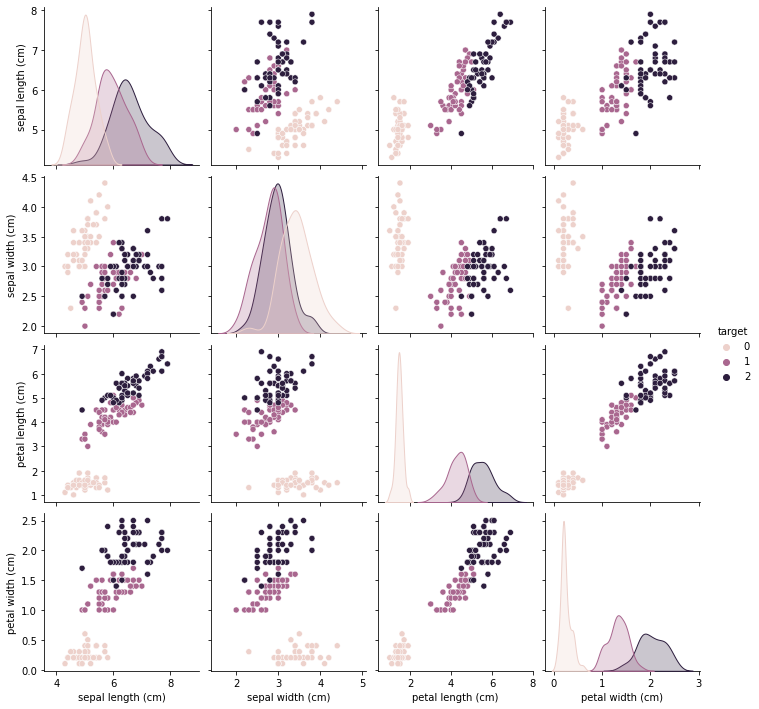

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

################################################
import warnings
warnings.filterwarnings("ignore") #for suppressing the warnings
################################################

iris = load_iris() #loading the data

df = pd.concat([pd.DataFrame(list(iris.data), columns= iris.feature_names), pd.DataFrame(list(iris.target), columns= ["target"])], axis=1) #building a dataframe from the data so we could use for easier visualization

sns.pairplot(df, hue="target", size=2.5) #Visualizing the data to get a better understanding of its distrubtion and the weights of diffrent features

##### After we visualized our data and got a better understanding of what we're working with we can start by constructing the model


In [3]:
inp_df = df.drop(df.columns[[4]], axis=1) #the input for the model
out_df = df.drop(df.columns[[0,1,2,3]], axis=1) #output (the classes)

#for getting X and y we could've easily used X,y = load_iris(return_Xy = True) but since it's easier to visualize the data as a dataframe i just went with it.
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42) #80-20 training the testing ratio
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Decision Tree with the help of Sklearn:

In [4]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test,pred) #Note: by removing the max depth we could reach an accuracy of 100% but i want a better view of the tree so i only allowed 2 decisions 
print('accuracy rate', acc)

accuracy rate 0.9666666666666667


#### Visualizing the tree

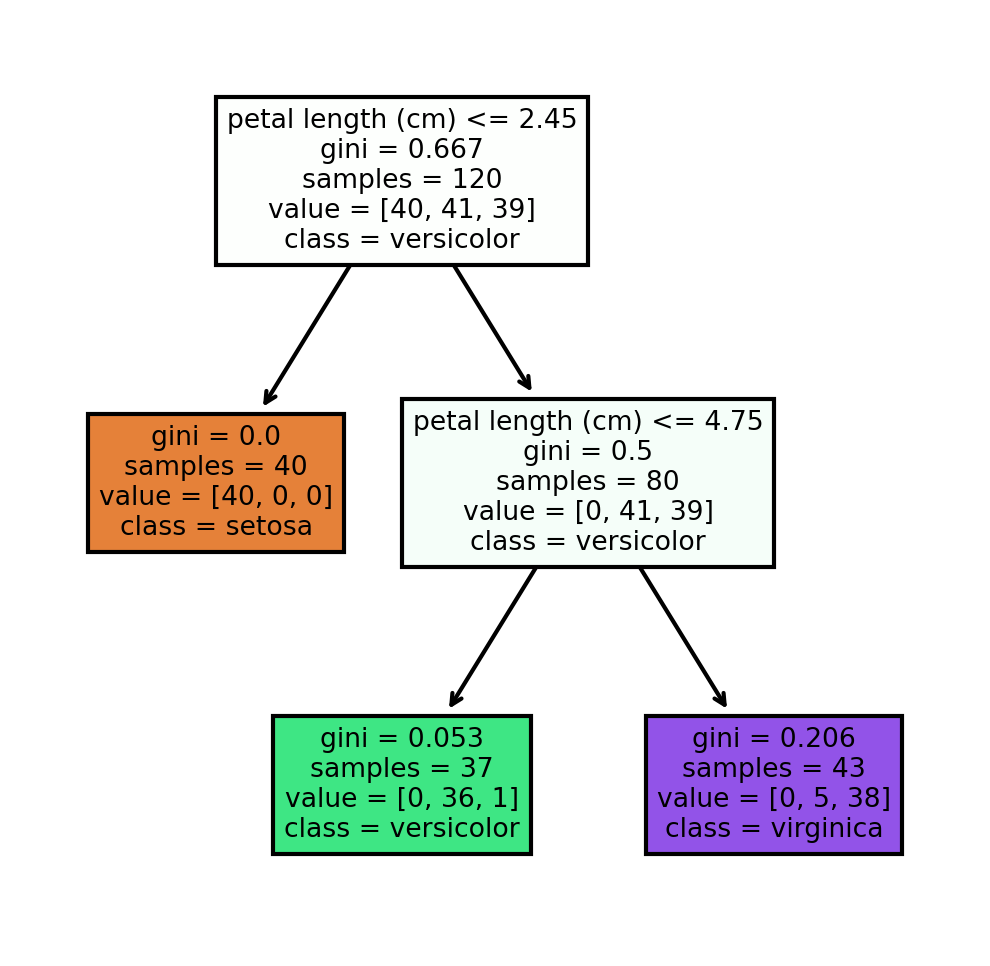

In [5]:
import matplotlib.pyplot as plt

fn= iris.feature_names
cn= iris.target_names

fig= plt.figure(figsize = (4,4), dpi=300)

tree.plot_tree(clf,
                feature_names = fn, 
                class_names=cn,
                filled = True);
